<a href="https://colab.research.google.com/github/Eistam/CIND820-Project/blob/main/PLEASE_IGNORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
   
df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']))

NameError: ignored

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

NameError: ignored

In [ ]:
#checking if dataset has null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dataset has no missing values

In [ ]:
#checking for categorical columns
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

In [ ]:
#this function returns categorical variables distribution
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

In [ ]:
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    


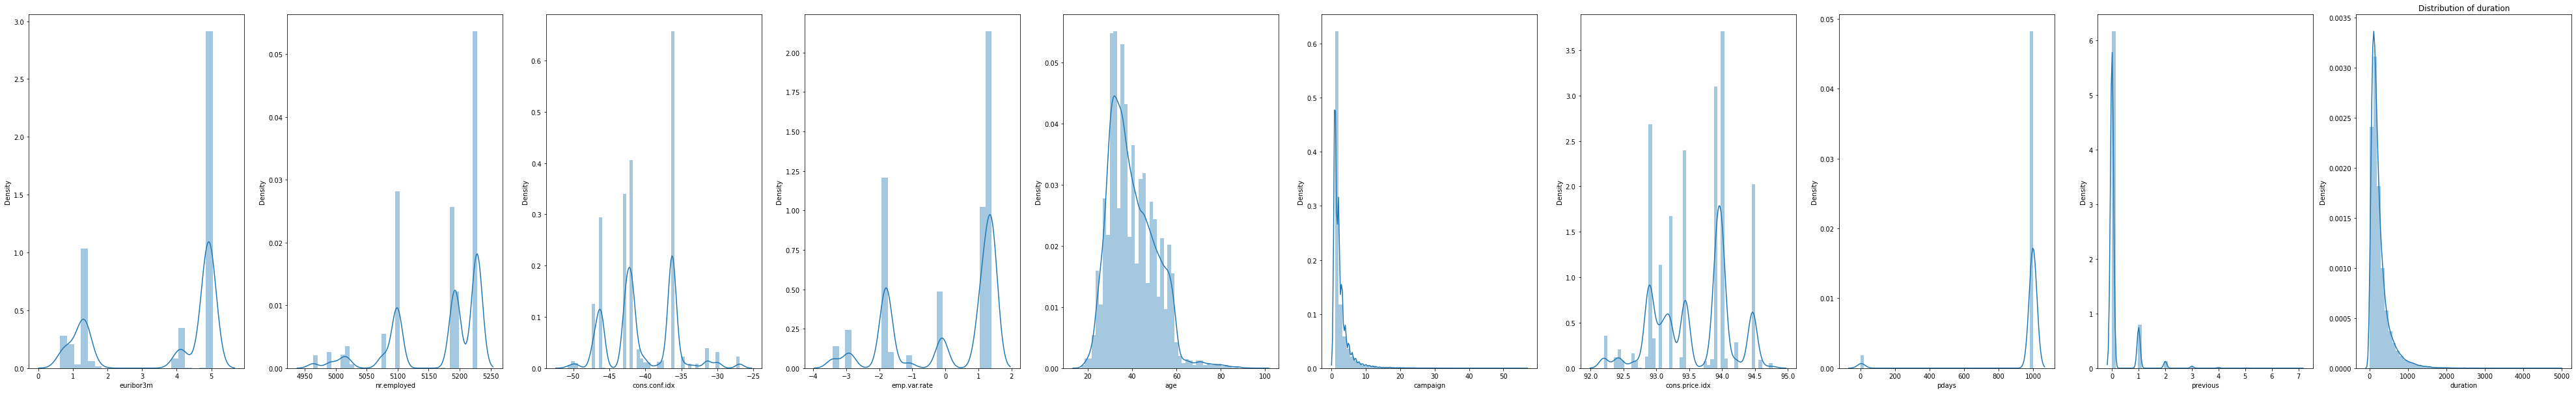

In [ ]:
#Checking Distribution For Continuous Variables
check_normal(df)


In [ ]:
#Plots For Categorical Variables
for col in df.columns:
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

NameError: ignored

In [ ]:
#summary of the data for attributes with categorical values (with highest figure)
#Job - Management and blue collar 
#Marital - Marrieds
#Education - Secondary
#Default - No
#Housing  - yes
#Loan - No
#Contact - Cellular
#Month - May
#Poutcome - Unknown
#Y - No

In [ ]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


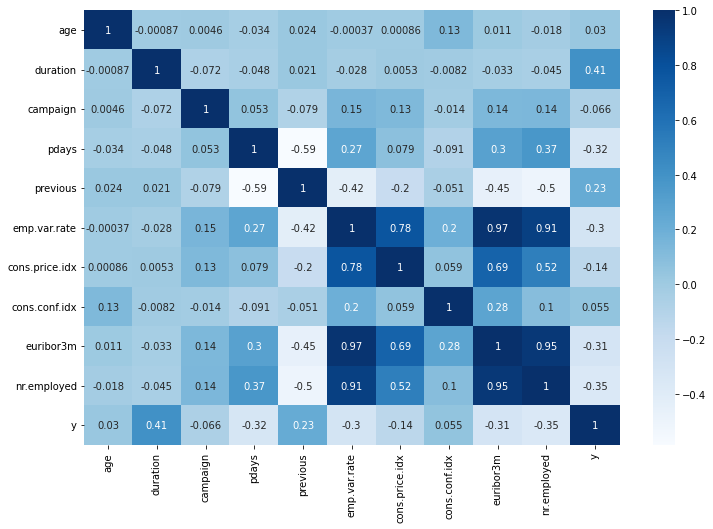

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues", annot = True);

#There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. 

In [ ]:
#Checking Housing attribute
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df['y'].groupby(df['housing']).value_counts(normalize = True)

housing  y
no       0    0.891204
         1    0.108796
unknown  0    0.891919
         1    0.108081
yes      0    0.883806
         1    0.116194
Name: y, dtype: float64

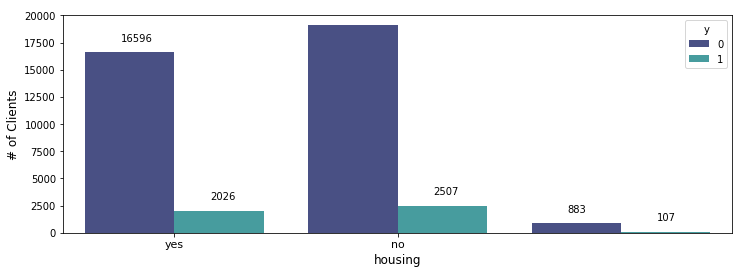

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'housing', hue="y", palette = 'mako')

plt.xlabel("housing", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],[ 'yes', 'no'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

In [ ]:
#Checking Loan attribute
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df['y'].groupby(df['housing']).value_counts(normalize = True)

housing  y
no       0    0.891204
         1    0.108796
unknown  0    0.891919
         1    0.108081
yes      0    0.883806
         1    0.116194
Name: y, dtype: float64

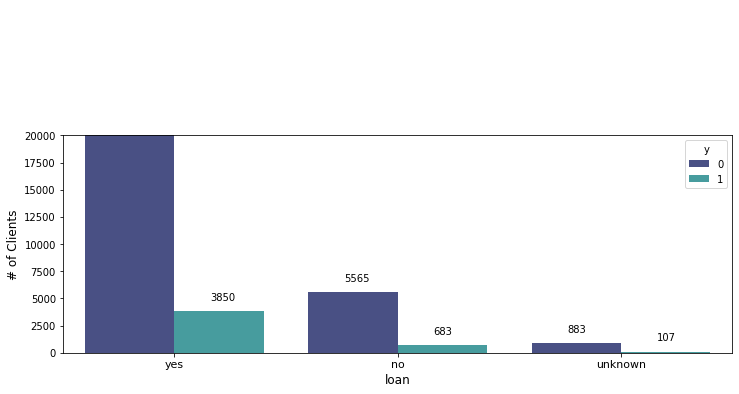

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'loan', hue="y", palette = 'mako')

plt.xlabel("loan", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],[ 'yes', 'no', 'unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

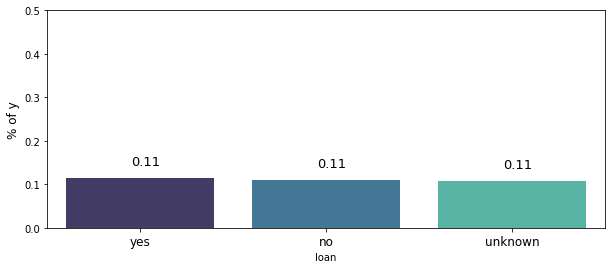

In [ ]:
# percentage of client with loans Vs the respondents
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "loan", y = "y", data = df, palette = 'mako', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1, 2],['yes', 'no', 'unknown'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

In [ ]:
#Checking Month attribute
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
df['y'].groupby(df['month']).value_counts(normalize = True)

month  y
apr    0    0.795213
       1    0.204787
aug    0    0.893979
       1    0.106021
dec    0    0.510989
       1    0.489011
jul    0    0.909534
       1    0.090466
jun    0    0.894885
       1    0.105115
mar    1    0.505495
       0    0.494505
may    0    0.935653
       1    0.064347
nov    0    0.898561
       1    0.101439
oct    0    0.561281
       1    0.438719
sep    0    0.550877
       1    0.449123
Name: y, dtype: float64

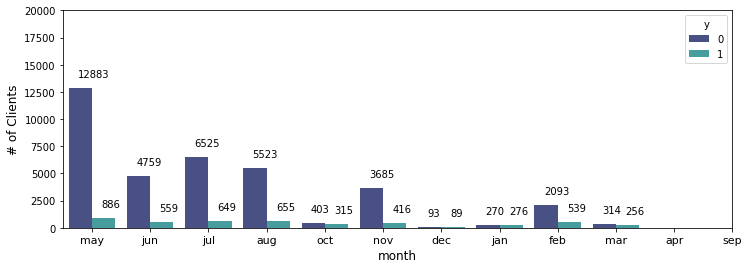

In [ ]:
# Distribution of clients response according to Month
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'month', hue="y", palette = 'mako')

plt.xlabel("month", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['may', 'jun', 'jul', 'aug', 'oct', 'nov' ,'dec', 'jan' ,'feb' ,'mar', 'apr', 'sep'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

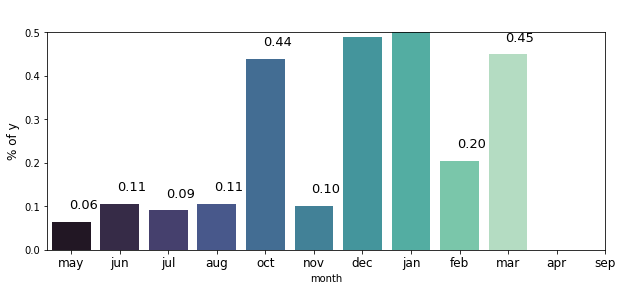

In [ ]:
#percentage of clients response according to month
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "month", y = "y", data = df, palette = 'mako', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['may', 'jun', 'jul', 'aug', 'oct', 'nov' ,'dec', 'jan' ,'feb' ,'mar', 'apr', 'sep'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

In [ ]:
#checking Contact atrribute
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
df['y'].groupby(df['contact']).value_counts(normalize = True)

contact    y
cellular   0    0.852624
           1    0.147376
telephone  0    0.947687
           1    0.052313
Name: y, dtype: float64

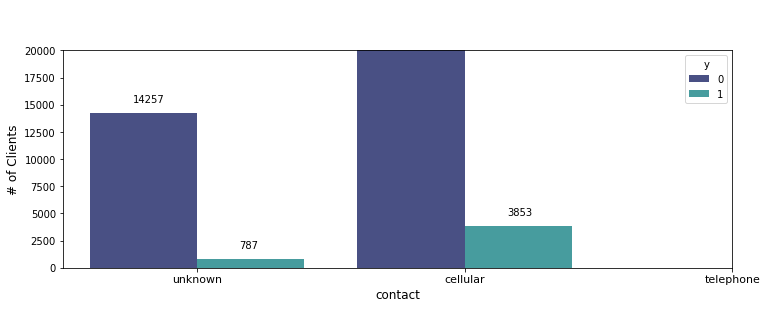

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'contact', hue="y", palette = 'mako')

plt.xlabel("contact", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1,2],['unknown' ,'cellular' ,'telephone'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

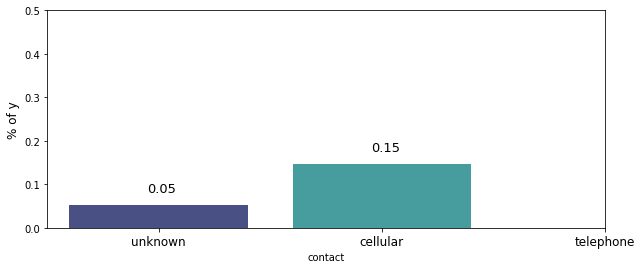

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "contact", y = "y", data = df, palette = 'mako', ci = None)

plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['unknown' ,'cellular' ,'telephone'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

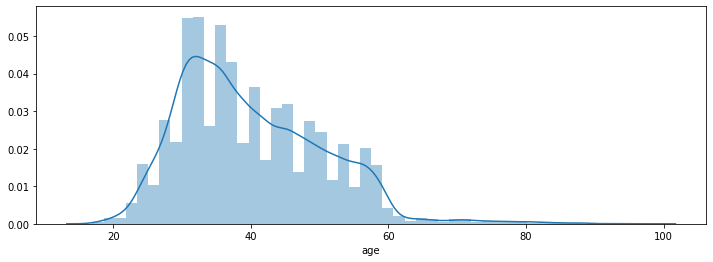

In [ ]:
#Checking Age attribute
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

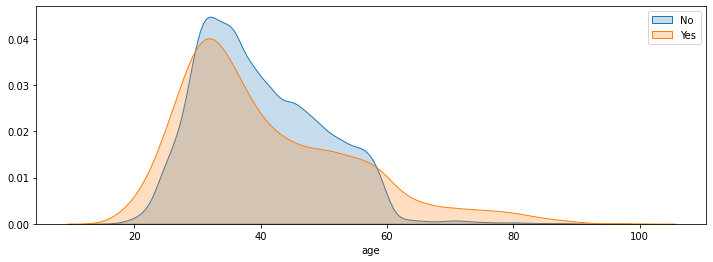

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['y'] == 0), 'age'], label = 'No ', shade = True)
sns.kdeplot(df.loc[(df['y'] == 1), 'age'], label = 'Yes', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

#Most people in our dataset have between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower, but we could divide our dataset in bins and check the percentage of default in each age group to be sure.

In [ ]:
df['AgeBin'] = pd.cut(df['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['AgeBin'].value_counts())

(40, 50]    10240
(30, 35]     9130
(35, 40]     7255
(50, 60]     6270
(25, 30]     5717
(20, 25]     1526
(60, 80]      791
Name: AgeBin, dtype: int64


#The distribution of age: In the telemarketing campaigns, the age range of called by the bank is from 18 to 95 years old. However, a majority of customers called is in the age of 40s and 50s 

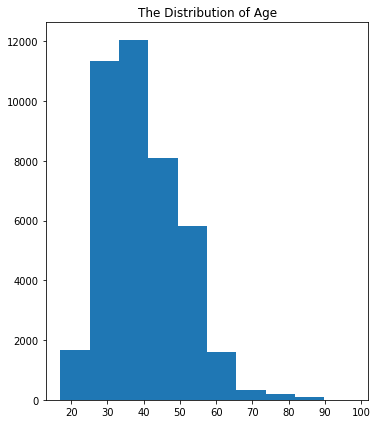

In [ ]:
dist_age_y = plt.figure(figsize = (10,6))

ra1 = dist_age_y.add_subplot(1,2,1) 


ra1.hist(df['age'])
ra1.set_title('The Distribution of Age')


plt.tight_layout() 
plt.show()


The distribution of customer age is fairly normal with a small standard deviation.

In [ ]:
df['y'].groupby(df['AgeBin']).value_counts(normalize = True)

AgeBin    y
(20, 25]  0    0.808650
          1    0.191350
(25, 30]  0    0.864439
          1    0.135561
(30, 35]  0    0.894304
          1    0.105696
(35, 40]  0    0.912888
          1    0.087112
(40, 50]  0    0.918262
          1    0.081738
(50, 60]  0    0.893461
          1    0.106539
(60, 80]  0    0.551201
          1    0.448799
Name: y, dtype: float64

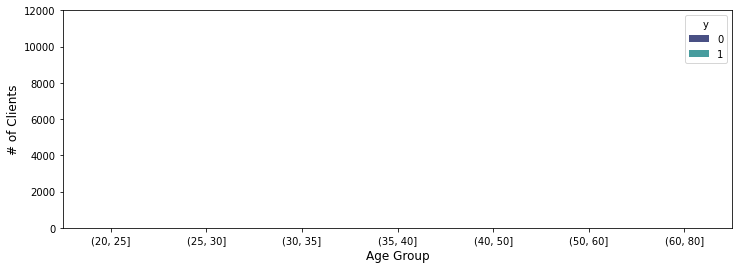

In [ ]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="y", palette = 'mako', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

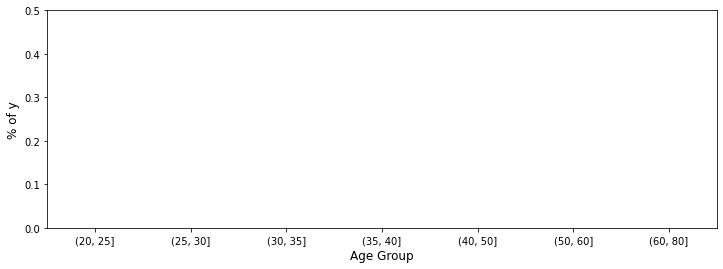

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "y", data = df, palette = 'mako', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of y", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()


In [ ]:
# Resonse (y) by Balance
plt.figure(figsize=(12,4))

sns.distplot(df['balance'])
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.show()

KeyError: ignored

<Figure size 864x288 with 0 Axes>

In [ ]:

plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['y'] == 0), 'balance'], label = 'No ', shade = True)
sns.kdeplot(df.loc[(df['y'] == 1), 'balance'], label = 'Yes', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()


In [ ]:
df['BalBin'] = pd.cut(df['balance'],[0, 500, 1000, 2000,5000, 110000])
print(df['BalBin'].value_counts())

In [ ]:
df['y'].groupby(df['BalBin']).value_counts(normalize = True)

In [ ]:
plt.figure(figsize=(12,4))

df['BalBin'] = df['BalBin'].astype('str')
BalBin_order = ['0, 500]', '(500, 1000]', '(1000, 2000]', '(2000, 5000]',
                '(5000, 110000]']

ax = sns.countplot(data = df, x = 'BalBin', hue="balance", palette = 'rocket', order = BalBin_order)

plt.xlabel("Amount of Balance", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [ ]:
lst = [df]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

#Compare those who responded to term deposit (y) to demographic features

In [ ]:
# y vs Marital and Balance
df.groupby('marital')['balance'].mean()

In [ ]:

plt.figure(figsize=(12,6))

sns.boxplot(x = "marital", y = "balance",data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['divorced', 'married', 'single'], fontsize = 12)

plt.show()

In [ ]:
#Education vs balance
df.groupby('education')['balance'].mean()

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "education", y = "balance", data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['primary','secondary','tertiary','Unknown'], fontsize = 11)

plt.show()


In [ ]:
df.groupby('AgeBin')['balance'].mean()

In [ ]:
#Marital vs Balance vs Default
plt.figure(figsize=(14,6))

sns.boxplot(x = "marital", y = "balance", hue = 'default', data = df, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Married', 'Single', 'Divorce'], fontsize = 11)

plt.show()

Prepare Data for Classification



In [ ]:
#make a copy of dataset and separate the features from the target variable.
X = df.copy().drop('y', axis = 1)
Y = df['y']

In [ ]:
X

In [ ]:
X.info()

#The first approach will be to use only the original features. We will create a copy of 'X' and remove the created features from it.

In [ ]:
df  = pd.get_dummies(df, drop_first = True)

In [ ]:

dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(dataset['response_binary'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)

In [ ]:
x = df.drop("y", axis=1)
y = df['y']
x.sample()

test_size= 0.20
seed = 7
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=seed)

In [ ]:
rf_model = RandomForestClassifier(random_state = seed)

rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

print("Test Accuracy: ",metrics.accuracy_score(y_test, pred_rf))

#The Random Forest yielded an accuracy of 90.76% which potentially looks like a good score. However, EDA section indicated that the data was not balance since many custeomers did not respond positively to the term deposit telemarketing

In [ ]:
rf_confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()


In [ ]:
print(metrics.classification_report(y_test, pred_rf, labels = [0, 1]))

In [ ]:
# First XGBoost model for telemarketing dataset dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb


In [ ]:
# split data into X and y
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

ValueError: ignored

In [ ]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
print(X_train.dtypes)


age           int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
dtype: object


In [ ]:
# converting categorical variable to string (one-hot encoding)
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X_train['job'] = lbl.fit_transform(X_train['job'].astype(str))
X_train['marital'] = lbl.fit_transform(X_train['marital'].astype(str))
X_train['education'] = lbl.fit_transform(X_train['education'].astype(str))
X_train['default'] = lbl.fit_transform(X_train['default'].astype(str))
X_train['housing'] = lbl.fit_transform(X_train['housing'].astype(str))
X_train['loan'] = lbl.fit_transform(X_train['loan'].astype(str))
X_train['contact'] = lbl.fit_transform(X_train['contact'].astype(str))


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

ValueError: ignored

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=df, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

AttributeError: ignored

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

ValueError: ignored

In [ ]:
watchlist = [(X_test, 'test'), (X_train, 'train')]
xg_reg = xgb.train(params=params, dtrain=df, num_boost_round=10)

TypeError: ignored

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

TypeError: ignored